In [1]:
pip install sorted-months-weekdays

  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-cp36-none-any.whl size=3237 sha256=d6611dd3e0b8520dfdbaf595b1915ee501e04974998a3f798fbf4dbce4bcabdb
  Stored in directory: /root/.cache/pip/wheels/11/2f/19/05e3f8e6a6d06a2e962f0a172bc9736451f6518e2db6d1ab6d
Successfully built sorted-months-weekdays


In [2]:
pip install sort-dataframeby-monthorweek

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-cp36-none-any.whl size=3438 sha256=fe223adbc9342af3c51bf90b470dad8d7baa1f837d693ff990de44cae025b2cc
  Stored in directory: /root/.cache/pip/wheels/4c/35/02/083a8cdd13de15416e153a50324450c15189d259c861f9f964
Successfully built sort-dataframeby-monthorweek


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
pip install --upgrade google-cloud-bigquery

     |████████████████████████████████| 174kB 5.0MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
ERROR: tensorflow-model-optimization 0.2.1 requires enum34~=1.1, which is not installed.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.15.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.7.2, but you'll have google-auth 1.11.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you'll have six 1.14.0 which is incompatible.
ERROR: google-cloud-storage 1.16.2 has requirement google-resumable-media<0.5.0dev,>=0.3.1, but you'll have google-resumable-media 0.5.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirem

In [0]:
from google.cloud import bigquery
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file(
    '/content/drive/My Drive/ML_works/Internet_sathi/IS_ML_PROBLEMS/infra-211714-fa79bf90e271.json')
project_id = 'infra-211714'
client = bigquery.Client(credentials= credentials,project=project_id)

In [0]:
pingu=client.query('''select deviceId,formId,formName,allocatedDate,villageName,blockName,stateName,districtName,mobileCreatedAt as submission_date,respSubmitted as count_of_submissions,villagesForTheForm as visited_villages,FORMAT_DATETIME("%B",Datetime(mobileCreatedAt)) as month,FORMAT_DATETIME("%Y", Datetime(mobileCreatedAt)) as year from (SELECT * FROM `infra-211714.ML_Automation_Data.saathi_engagement` CROSS JOIN UNNEST(SubmissionDate) as unnesting)''').result().to_dataframe()
pingu=pingu.dropna()

In [41]:
mingu=client.query('''select * FROM `infra-211714.ML_Automation_Data.saathi_engagement` where formId = 25 and deviceID = "5b065ba513522b35f9a7da21" 
select deviceId,formId,formName,allocatedDate,villageName,blockName,stateName,districtName,mobileCreatedAt as submission_date,respSubmitted as count_of_submissions,villagesForTheForm as visited_villages,FORMAT_DATETIME("%B",Datetime(mobileCreatedAt)) as month,FORMAT_DATETIME("%Y", Datetime(mobileCreatedAt)) as year from (SELECT * FROM `infra-211714.ML_Automation_Data.saathi_engagement` CROSS JOIN UNNEST(SubmissionDate) as unnesting  where formId = 25 and deviceID = "5b065ba513522b35f9a7da21")''').result().to_dataframe()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 497))



BadRequest: ignored

In [21]:
pingu.tail()

,deviceId,formId,formName,allocatedDate,villageName,blockName,stateName,districtName,submission_date,count_of_submissions,visited_villages,month,year
287175,5af44ecd9e6a9d4028dadf81,1411,Household + Media,2018-05-10 13:57:10,Govindapuram,Chilakaluripet Ho.Purushotha Patnam,Andhra Pradesh,Guntur,2018-05-15,4,[Irlapadu],May,2018
287176,5af44ecd9e6a9d4028dadf81,1411,Household + Media,2018-05-10 13:57:10,Govindapuram,Chilakaluripet Ho.Purushotha Patnam,Andhra Pradesh,Guntur,2018-05-16,3,[Irlapadu],May,2018
287177,5af44ecd9e6a9d4028dadf81,1411,Household + Media,2018-05-10 13:57:10,Govindapuram,Chilakaluripet Ho.Purushotha Patnam,Andhra Pradesh,Guntur,2018-05-12,6,[Govindapuram],May,2018
287178,5af44ecd9e6a9d4028dadf81,1414,Village,2018-05-10 13:54:31,Govindapuram,Chilakaluripet Ho.Purushotha Patnam,Andhra Pradesh,Guntur,2018-05-12,1,[Govindapuram],May,2018
287179,5af44ecd9e6a9d4028dadf81,1414,Village,2018-05-10 13:54:31,Govindapuram,Chilakaluripet Ho.Purushotha Patnam,Andhra Pradesh,Guntur,2018-05-15,1,[Irlapadu],May,2018


In [22]:
len(data)

277958

In [0]:
original_data= client.query('''
WITH
  cf AS (
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_bain`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_Busara`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_beneficiaryprofile`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_cisco`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_Feedback`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_googlebolo`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_hulplastic`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_internetsafety`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_kantar`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_multilink`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_plasticconsumption`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_redbus`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_undpharyana`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_undpkarnataka`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_Unicef`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_washprogramme`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_tataamc`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_main_accelerator`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_google200`
  UNION ALL
  SELECT
    id,
    formId,
    transactionID,
    formUniqueId,
    isActive,
    createdAt,
    modifiedAt,
    LANGUAGE,
    location,
    timeTaken,
    deviceId,
    loginId,
    internetSathiProfileId,
    village,
    block,
    district,
    state,
    partner,
    mobileCreatedAt,
    mobileUpdatedAt
  FROM
    `infra-211714.is_dashboard.clientformdatas_hulplastic` ),
  d AS(
  SELECT
    id,
    ARRAY_AGG( district
    ORDER BY
      modifiedAt DESC
    LIMIT
      1 )[
  OFFSET
    (0)].* EXCEPT (id)
  FROM
    `infra-211714.is_dashboard.devices` AS district
  GROUP BY
    id),
  vl AS(
  SELECT
    id,
    ARRAY_AGG( district
    ORDER BY
      modifiedAt DESC
    LIMIT
      1 )[
  OFFSET
    (0)].* EXCEPT (id)
  FROM
    `infra-211714.is_dashboard.villages` AS district
  GROUP BY
    id),
  bl AS(
  SELECT
    id,
    ARRAY_AGG( district
    ORDER BY
      modifiedAt DESC
    LIMIT
      1 )[
  OFFSET
    (0)].* EXCEPT (id)
  FROM
    `infra-211714.is_dashboard.blocks` AS district
  GROUP BY
    id),
  st AS(
  SELECT
    id,
    ARRAY_AGG( district
    ORDER BY
      modifiedAt DESC
    LIMIT
      1 )[
  OFFSET
    (0)].* EXCEPT (id)
  FROM
    `infra-211714.is_dashboard.states` AS district
  GROUP BY
    id),
  ds AS(
  SELECT
    id,
    ARRAY_AGG( district
    ORDER BY
      modifiedAt DESC
    LIMIT
      1 )[
  OFFSET
    (0)].* EXCEPT (id)
  FROM
    `infra-211714.is_dashboard.districts` AS district
  GROUP BY
    id),
  sp AS(
  SELECT
    id,
    ARRAY_AGG( district
    ORDER BY
      modifiedAt DESC
    LIMIT
      1 )[
  OFFSET
    (0)].* EXCEPT (id)
  FROM
    `infra-211714.is_dashboard.saathiprofiles` AS district
  GROUP BY
    id),
  sf AS(
  SELECT
    id,
    ARRAY_AGG( sp
    ORDER BY
      modifiedAt DESC
    LIMIT
      1 )[
  OFFSET
    (0)].* EXCEPT (id)
  FROM
    `infra-211714.is_dashboard.saathi_form` AS sp
  GROUP BY
    id),
  forms AS(
  SELECT
    id,
    ARRAY_AGG( district
    ORDER BY
      modifiedAt DESC
    LIMIT
      1 )[
  OFFSET
    (0)].* EXCEPT (id)
  FROM
    `infra-211714.is_dashboard.forms` AS district
  GROUP BY
    id),  
  distinctDays AS (
  SELECT
    deviceId,
    DATE(mobileCreatedAt) AS mobileCreatedAt,
    formId,
    COUNT(DISTINCT cf.id) AS respSubmitted,
    ARRAY_AGG(DISTINCT vl.name IGNORE NULLS) AS villagesForTheForm,
    ARRAY_AGG(cf.location order by cf.mobileCreatedAt) as location
  FROM
    cf
  LEFT JOIN
    vl
  ON

    vl.id = cf.village
  GROUP BY
    deviceId,
    DATE(mobileCreatedAt),
    formId)
  --   formWiseVillages AS (
    --   SELECT
    --     DISTINCT deviceId,
    --     formId,
    --     vl.name AS villagesForTheForm
    --   FROM
    --     cf
    --   JOIN
    --     vl
    --   ON
    --     vl.id = cf.village
    --  )
SELECT
  d.id AS deviceId,
  sf.formId,
  forms.form_name AS formName,
  sf.createdAt AS allocatedDate,
  vl.name AS villageName,
  bl.name AS blockName,
  st.name AS stateName,
  ds.name AS districtName,
  --   ARRAY_AGG(DISTINCT distinctDays.villagesForTheForm) AS villagesForTheForm,
  ARRAY_AGG(STRUCT(distinctDays.mobileCreatedAt,
      distinctDays.respSubmitted,
      distinctDays.villagesForTheForm,
      distinctDays.location ) ) AS SubmissionDate

FROM
  d
JOIN
  sf
ON
  sf.deviceId = d.id
JOIN
  forms
ON
  forms.formId = sf.formId
LEFT JOIN
  sp
ON
  sp.deviceid = d.id
LEFT JOIN
  vl
ON
  vl.id = sp.village
LEFT JOIN
  ds
ON
  ds.id = vl.district
LEFT JOIN
  st
ON
  st.id = vl.state
LEFT JOIN
  bl
ON
  bl.id = vl.block
  -- LEFT JOIN
  --   formWiseVillages
  -- ON
  --   formWiseVillages.deviceId = d.id
  --   AND formWiseVillages.formId = sf.formId
JOIN
  distinctDays
ON
  distinctDays.formID = sf.formId
  AND distinctDays.deviceId = d.id
  -- left join cf on cf.formId = sf.formId and cf.deviceId = d.id left join vl as v on v.id = cf.village
GROUP BY
  d.id,
  sf.formId,
  formName,
  allocatedDate,
  vl.name,
  bl.name,
  ds.name,
  st.name''').result().to_dataframe()

In [42]:
def latmean(nice):
  a=[]
  a.append(np.mean(list(map(float,nice))))
  return np.mean(a)
def funy(nice):
  mca=[]
  cos=[]
  vv=[]
  lat=[]
  lon=[]
  for i in range(0,len(nice)):
    a=[]
    b=[]
    mca.append(pd.to_datetime(nice[i]["mobileCreatedAt"]))
    cos.append(nice[i]["respSubmitted"])
    vv.append(nice[i]["villagesForTheForm"])
    for m in range(0,len(nice[i]["location"])):
      a.append(nice[i]["location"][m]["lat"])
      b.append(nice[i]["location"][m]["lng"])
    lat.append(a)
    lon.append(b)
  return [mca,cos,vv,lat,lon]
#creating the features
df=original_data
df["fun"]=df.SubmissionDate.apply(lambda nice:funy(nice))
df["submission_date"]=df.fun.apply(lambda nice:pd.to_datetime(nice[0]))
df["count_of_submissions"]=df.fun.apply(lambda nice:((nice[1])))
df["visited_villages"]=df.fun.apply(lambda nice:(nice[2]))
df["latitude"]=df.fun.apply(lambda nice:(nice[3]))
df["longitude"]=df.fun.apply(lambda nice:(nice[4]))
#exploding the features
fd=df.explode("count_of_submissions").reset_index(drop=True).loc[:,:"count_of_submissions"]
fd["latitude"]=df.explode("latitude").reset_index(drop=True).loc[:,"latitude"]
fd["longitude"]=df.explode("longitude").reset_index(drop=True).loc[:,"longitude"]
fd["submission_date"]=df.explode("submission_date").reset_index(drop=True).loc[:,"submission_date"]
fd["visited_villages"]=df.explode("visited_villages").reset_index(drop=True).loc[:,"visited_villages"]
data=fd
data=data.drop(["SubmissionDate","fun"], axis=1)

data["mean_latitude"]=data.latitude.apply(lambda x:latmean(x))
data["mean_longitude"]=data.longitude.apply(lambda x:latmean(x))
data["month"]=data.submission_date.apply(lambda x:pd.to_datetime(x).month_name())
data["weekday_name"]=data.submission_date.apply(lambda x:pd.to_datetime(x).weekday_name)
data["year"]=pd.Series(data.submission_date.apply(lambda x:pd.to_datetime(x).year))
data["count_of_submissions"]=data.count_of_submissions.astype(int)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# data=data.dropna()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead


In [39]:
pingu[pingu.formId==6004].formId.value_counts()

6004    3476
Name: formId, dtype: int64

In [43]:
data[data.formId==6004].formId.value_counts()

6004    3476
Name: formId, dtype: int64

In [13]:
original_data.head(1)

,deviceId,formId,formName,allocatedDate,villageName,blockName,stateName,districtName,SubmissionDate,fun,submission_date,count_of_submissions,visited_villages,latitude,longitude
0,5ad87854295f0ac2b02ee8ae,4,Adolescent Girl Identification,2018-06-15 16:43:22,Shahpur Bara,Gilaula,Uttar Pradesh,Shrawasti,"[{'mobileCreatedAt': 2018-06-27, 'respSubmitte...","[[2018-06-27 00:00:00], [10], [[Shahpur Bara, ...","DatetimeIndex(['2018-06-27'], dtype='datetime6...",[10],"[[Shahpur Bara, Harbanshpur]]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [0]:
month_wise_freq_distribution=dict(data.month.value_counts())

In [0]:
month_wise_freq_distribution

{'April': 28612,
 'August': 2629,
 'December': 2184,
 'February': 6840,
 'January': 113742,
 'July': 2559,
 'June': 22887,
 'March': 2277,
 'May': 80888,
 'November': 10027,
 'October': 1933,
 'September': 3377}

In [0]:
data=pingu

In [0]:
def month_wise_frequency_count():
  final_output=dict(Sort_Dataframeby_Month(df=data,monthcolumnname='month').month.value_counts())
  result={"title":list(final_output.keys()), "values":list(final_output.values()), "unit":"frequency"}
  return result

In [27]:
month_wise_frequency_count()

{'title': ['January',
  'May',
  'April',
  'June',
  'November',
  'February',
  'August',
  'September',
  'July',
  'March',
  'December',
  'October'],
 'unit': 'frequency',
 'values': [114209,
  83638,
  30957,
  22927,
  11086,
  7116,
  4255,
  3774,
  2704,
  2295,
  2281,
  1938]}

In [28]:
dict(Sort_Dataframeby_Month(df=data,monthcolumnname='month').month.value_counts())

{'April': 30957,
 'August': 4255,
 'December': 2281,
 'February': 7116,
 'January': 114209,
 'July': 2704,
 'June': 22927,
 'March': 2295,
 'May': 83638,
 'November': 11086,
 'October': 1938,
 'September': 3774}

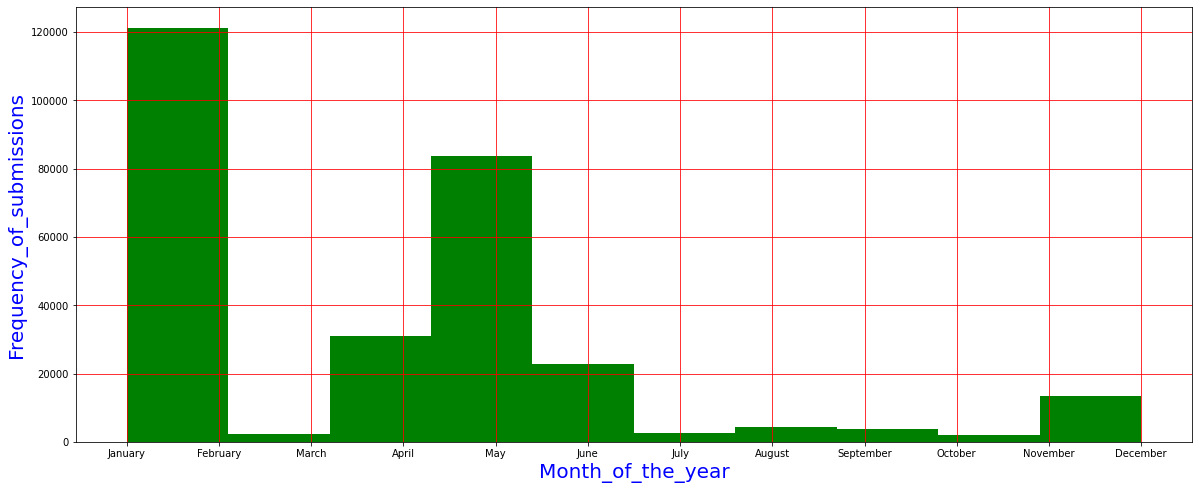

In [29]:
plt.figure(figsize=(20,8))
plt.hist(Sort_Dataframeby_Month(df=data,monthcolumnname='month').month, color="green")
plt.grid(True, color="red")
# plt.xticks(rotation=45)
# plt.title("MONTH WISE FREQUENCY DISTRIBUTION OF {}".format(nice.upper()), size=20, color="red")
plt.xlabel("Month_of_the_year", size=20, color="blue")
plt.ylabel("Frequency_of_submissions", size=20,color="blue")
plt.show()

In [30]:
list(data.year.unique())

['2019',
 '2020',
 '2018',
 '2010',
 '2016',
 '2015',
 '2012',
 '2013',
 '2017',
 '2011']

In [31]:
list(data.stateName.unique())

[None,
 'Uttar Pradesh',
 'Rajasthan',
 'Maharashtra',
 'Andhra Pradesh',
 'Bihar',
 'Madhya Pradesh',
 'Gujarat',
 'Assam',
 'Jharkhand',
 'West Bengal',
 'Haryana',
 'Tripura',
 'Uttarakhand',
 'Chhattisgarh',
 'Odisha',
 'Karnataka',
 'Tamil Nadu',
 'Punjab',
 'Telangana']

In [0]:
def month_wise_distribution_for_state(state,year):
  pingu=data[(data.stateName=="{}".format(state)) & (data.year==year)]
  y=pingu.groupby("month").sum().reindex(new_order, axis=0).count_of_submissions.values
  x=new_order
  final_output=dict(zip(new_order,y))
  result={"title":final_output.keys(), "values":final_output.values(), "unit":"months/count_of_responses"}
  return result

In [34]:
pingu.head()

,deviceId,formId,formName,allocatedDate,villageName,blockName,stateName,districtName,submission_date,count_of_submissions,visited_villages,month,year
0,5da566b12f6d3b1d5e931961,6004,Week 2 Milestones,2019-11-19 02:00:48,None,None,None,None,2019-11-19,1,[],November,2019
1,5de659906eafe84266a68da9,6005,Week 3 Milestones,2020-01-29 09:01:00,None,None,None,None,2020-01-29,1,[],January,2020
2,5dea4ab58423ff14e9787377,6004,Week 2 Milestones,2020-01-28 06:01:16,None,None,None,None,2020-01-28,1,[],January,2020
3,5da5662be9c6000e115aa181,6003,Week 1 Milestones,2019-10-30 13:01:48,None,None,None,None,2019-11-08,1,[],November,2019
4,5da566b02f6d3b1d5e931545,6003,Week 1 Milestones,2019-10-30 13:01:48,None,None,None,None,2019-11-08,1,[],November,2019


In [35]:
data[(data.stateName=="Bihar") & (data.year==2019)].groupby("month").sum().count_of_submissions

Series([], Name: count_of_submissions, dtype: int64)

In [0]:
month_wise_distribution_for_state("Bihar", 2019)

{'title': dict_keys(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']),
 'unit': 'months/count_of_responses',
 'values': dict_values([60071, 942, 33, 736, 99578, 16944, 490, 734, 610, 134, 4495, 133])}

In [0]:
def month_wise_distribution_for_state(nice,year):
  # nice=str(nice)
  plt.figure(figsize=(20,8))
  pingu=data[(data.stateName=="{}".format(nice)) & (data.year==year)]
  plt.bar(new_order,pingu.groupby("month").sum().reindex(new_order, axis=0).count_of_submissions.values/1000, color="red")
  plt.grid(True, color="green")
  plt.xlabel("MONTH NAME", color="red", size=12)
  plt.ylabel("TOTAL RESPONSE COUNT(IN THOUSANDS)", color="red", size=12)
  plt.title("MONTH WISE TOTAL SUBMISSIONS IN {a} IN {b}".format(a=nice.upper(),b=year), size=20, color="red")
  plt.xticks(rotation=45)
  plt.yticks(rotation=45)
  # plt.subplot(2,1,2)
  return plt.show()

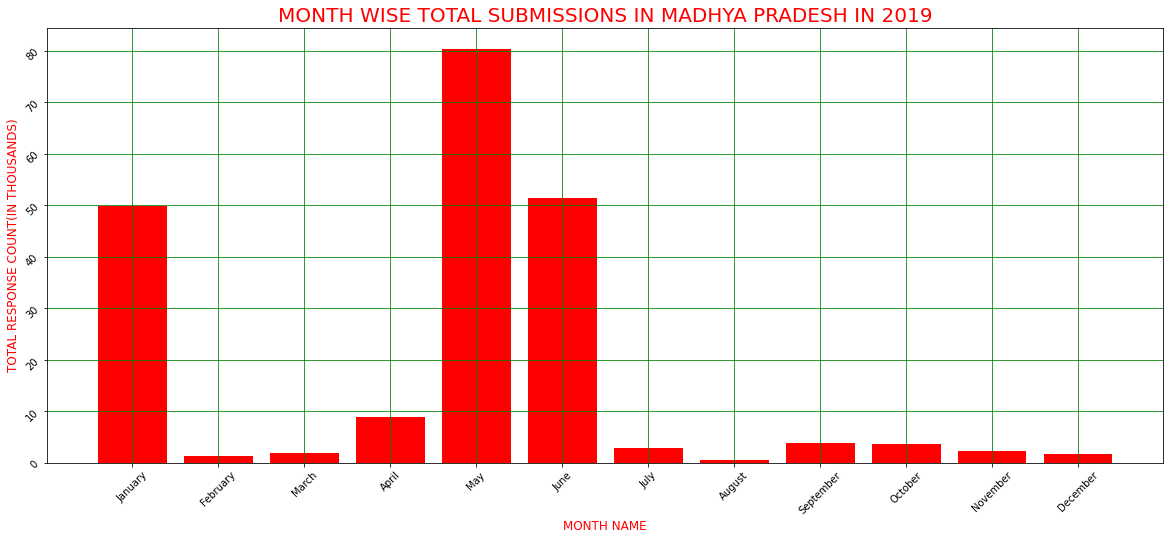

In [0]:
month_wise_distribution_for_state("Madhya Pradesh", 2019)

In [0]:
def form_submissions_in_india_in_year(year):
  temp_data=data[data.year==year]
  x=temp_data.stateName.unique()
  y=temp_data.groupby("stateName").count_of_submissions.sum()
  final_output=dict(zip(x,y))
  result={"title":final_output.keys(), "values":final_output.values(), "unit":"state/count of responses"}
  return result

In [0]:
form_submissions_in_india_in_year(2019)

{'title': dict_keys(['Uttar Pradesh', 'Maharashtra', 'Bihar', 'Jharkhand', 'Haryana', 'Karnataka', 'Madhya Pradesh', 'Tamil Nadu', 'Andhra Pradesh', 'Odisha', 'Rajasthan', 'Telangana', 'Punjab', 'West Bengal', 'Assam', 'Gujarat', 'Chhattisgarh', 'Uttarakhand']),
 'unit': 'state/count of responses',
 'values': dict_values([61641, 189, 184900, 310159, 27824, 15234, 298592, 7052, 209045, 2683, 317, 52, 31536, 26021, 66, 337440, 140994, 456])}

In [0]:
def form_submissions_in_india_in_year(year):
  plt.figure(figsize=(20,8))
  plt.bar(data[data.year==year].stateName.unique(), data[data.year==year].groupby("stateName").count_of_submissions.sum()/1000, color="red")
  plt.grid(True, color="green")
  plt.xlabel("Name of state", color="red")
  plt.ylabel("Number of submissions(in 1000)", color="red")
  plt.title("STATE WISE DISTRIBUTION OF NUMBER OF FORM SUBMISSIONS IN INDIA", color="red", size=20)
  plt.xticks(rotation=45)
  plt.show()

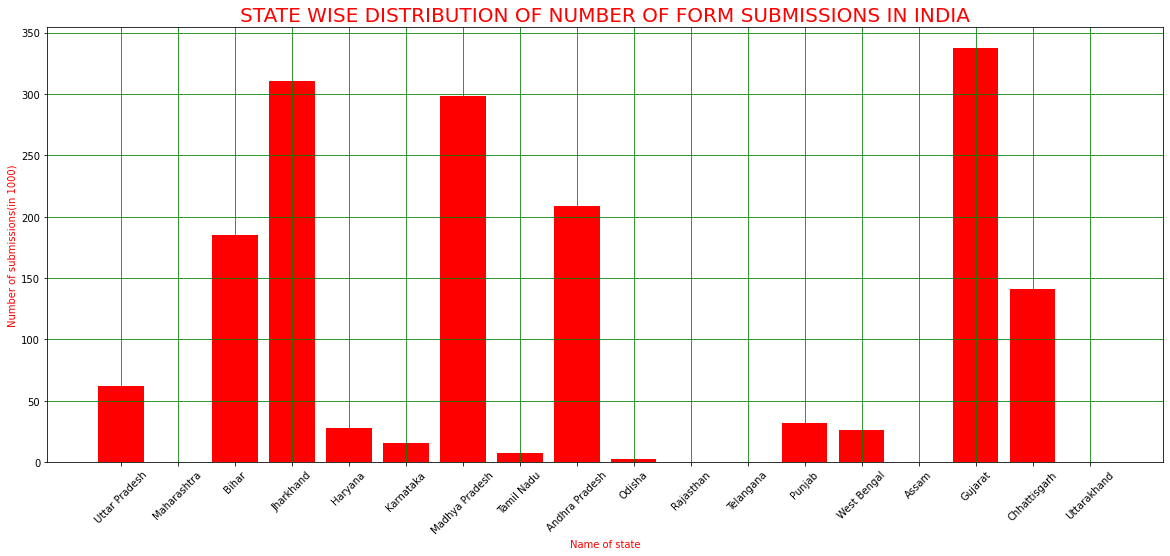

In [0]:
form_submissions_in_india_in_year(2019)

In [0]:
def month_wise_distribution_for_district_in_year(district_name,year):
  pingu=data[(data.districtName=="{}".format(district_name)) & (data.year==year)]
  x=new_order
  y=pingu.groupby("month").sum().reindex(new_order, axis=0).count_of_submissions.values
  final_output=dict(zip(x,y))
  result={"title":final_output.keys(), "values":final_output.values(), "unit":"month/count_of_submissions"}
  return result

In [0]:
month_wise_distribution_for_district_in_year("West Godavari", 2019)

{'title': dict_keys(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']),
 'unit': 'month/count_of_submissions',
 'values': dict_values([4947.0, 107.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}

In [0]:
district_list=list(data.districtName.unique())
state_list=list(data.stateName.unique())

In [0]:
state_list

['Uttar Pradesh',
 'Maharashtra',
 'Bihar',
 'Haryana',
 'Madhya Pradesh',
 'Rajasthan',
 'Tripura',
 'Jharkhand',
 'Tamil Nadu',
 'Andhra Pradesh',
 'Karnataka',
 'Chhattisgarh',
 'Odisha',
 'Telangana',
 'Punjab',
 'West Bengal',
 'Assam',
 'Gujarat',
 'Uttarakhand']

In [0]:
def month_wise_distribution_for_district_in_year(district_name,year):
  # nice=str(nice)
  plt.figure(figsize=(20,8))
  pingu=data[(data.districtName=="{}".format(district_name)) & (data.year==year)]
  plt.bar(new_order,pingu.groupby("month").sum().reindex(new_order, axis=0).count_of_submissions.values/1000, color="red")
  plt.grid(True, color="green")
  plt.xlabel("MONTH NAME", color="red", size=12)
  plt.ylabel("TOTAL RESPONSE COUNT(IN THOUSANDS)", color="red", size=12)
  plt.title("MONTH WISE TOTAL SUBMISSIONS IN {a} IN {b}".format(a=district_name.upper(),b=year), size=20, color="red")
  plt.xticks(rotation=45)
  plt.yticks(rotation=45)
  # plt.subplot(2,1,2)
  plt.show()

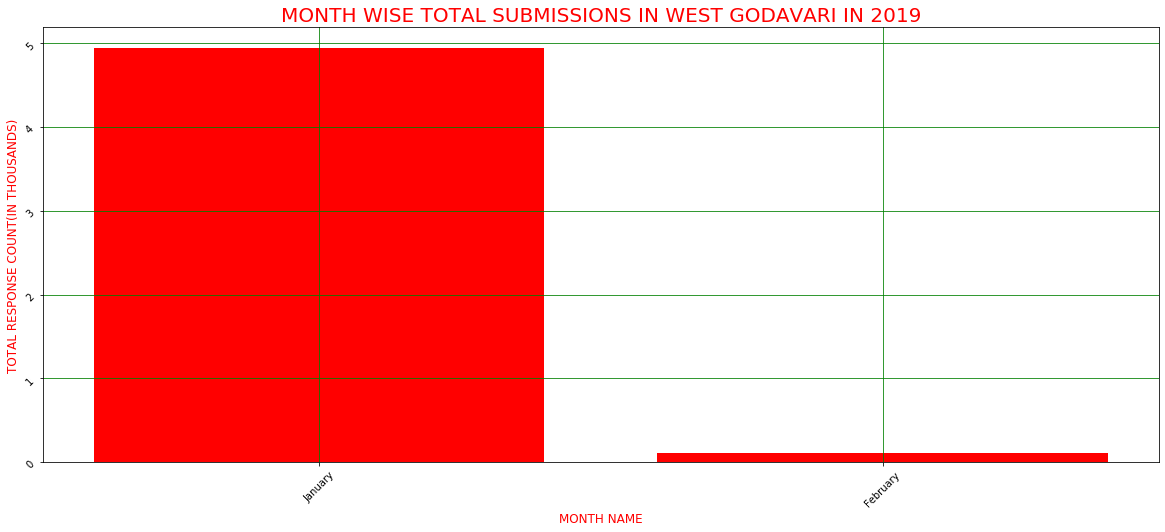

In [0]:
month_wise_distribution_for_district("West Godavari", 2019)